# VOTING REGRESSOR part 2

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("updated_placement.csv")

In [4]:
data.head(3)

,cgpa,package
0,9.75,68.493428
1,5.36,23.323471
2,5.65,27.795377


In [6]:
x = data.iloc[:,:-1]
y = data["package"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [30]:
# now we use all the regresson algo here 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [31]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(97.95073827055253, 92.71487664703356)

In [32]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)*100,dtr.score(x_test,y_test)*100

(100.0, 90.5486791504108)

In [50]:
sv = SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(76.57476393782964, 72.33644008989468)

In [51]:
# now we use voting regressor for this as explain in register 

In [52]:
from sklearn.ensemble import VotingRegressor

In [60]:
li = [("lr1",LinearRegression()),("dt1",DecisionTreeRegressor()),("SVR1",SVR())] # as according to part 1
 # as essemle learning part 1 it also uses list expalin in part 1

In [67]:
vr = VotingRegressor(li)
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dt1', DecisionTreeRegressor()), ('SVR1', SVR())])

In [68]:
vr.score(x_test,y_test)*100,vr.score(x_train,y_train)*100

(90.87717865962652, 96.65651817324633)

In [69]:
prd1 = {"lr":lr.predict(x_test),"dtr": dtr.predict(x_test),"svr":sv.predict(x_test),"vr":vr.predict(x_test)}

In [73]:
pd.DataFrame(prd1)

,lr,dtr,svr,vr
0,64.072209,64.392896,53.354520,60.606542
1,48.233102,52.293586,47.514801,49.347163
2,43.736839,43.340480,43.362959,43.480093
3,52.524989,52.848168,50.890950,52.088036
4,34.642126,35.948447,35.629273,35.406615
...,...,...,...,...
155,21.459901,20.007587,32.704913,24.724133
156,34.335562,35.254366,35.422309,35.004079
157,31.269929,27.550164,33.654592,30.824895
158,63.254707,64.761999,53.539877,60.518861


In [75]:
# now we check how it works is it work on an average
(64.072209+64.392896+53.354520)/3
# SO we can see vr is the average of 1st 3 

60.606541666666665

# bagging pg 57 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_moons

In [13]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [14]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [15]:
data1 = pd.DataFrame(df)

In [16]:
data1

,x1,x2,y
0,0.632445,1.297446,0
1,-0.242747,0.192813,1
2,-0.608879,1.128708,0
3,0.792374,-0.755898,1
4,0.668582,-0.285025,1
...,...,...,...
995,0.674139,-0.424409,1
996,1.052433,0.007583,1
997,1.003831,-0.608852,1
998,-0.804574,-0.008817,0


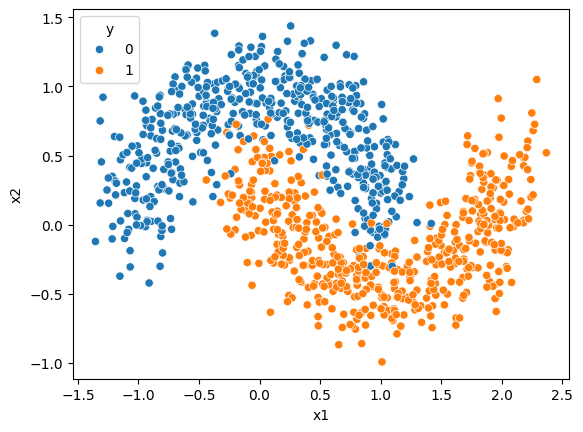

In [17]:
sns.scatterplot(x="x1",y ="x2",data=data1,hue = "y")
plt.show()

In [18]:
x_a = data1.iloc[:,:-1]
y_a = data1["y"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,train_size=0.2,random_state=42)

# bagiing meta estimator and random forest explain in reg 

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=20)

In [39]:
bg.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=20)

In [40]:
bg.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

(95.5, 94.625)

In [ ]:
# random forst 

In [41]:
rf = RandomForestClassifier(n_estimators=30)

In [42]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [43]:
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(100.0, 93.875)

In [ ]:
# we inremove overfitting by changing hyperparamters

In [44]:
# on regression data set 

In [45]:
data2= pd.read_csv("updated_placement.csv")
data2.head(3)

,cgpa,package
0,9.75,68.493428
1,5.36,23.323471
2,5.65,27.795377


In [51]:
x1 = data2.iloc[:,:-1]
y2 = data2["package"]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x1,y2,train_size=0.2,random_state=42)

In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [64]:
br = BaggingRegressor(estimator=LinearRegression(),n_estimators=40)

In [65]:
br.fit(x_train,y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=40)

In [66]:
br.score(x_train,y_train)*100,br.score(x_test,y_test)*100

(97.94616886646462, 92.680119776264)

In [67]:
# we can reduce overfitting by changing n_estimators

# rRandomForestRegressor

In [77]:
rfr = RandomForestRegressor(n_estimators=50)

In [78]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [79]:
rfr.score(x_train,y_train)*100,rfr.score(x_test,y_test)*100

(99.7600550759258, 91.35870803074813)